In [1]:
# 한글폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
# 한글처리
! pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving nikeshoes_blog.txt to nikeshoes_blog.txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving nike.jpg to nike.jpg


## 한글 텍스트 전처리

In [14]:
with open(textfile) as fp:
  text = fp.read()

In [15]:
from konlpy.tag import Okt
okt = Okt()

In [18]:
tokens = okt.nouns(text)
tokens[:10]

['신발', '나이키', '사카이', '블', '레이저', '로우', '그린', '상세', '후기', '포스팅']

In [12]:
twitter.add_dictionary('블레이저', 'Noun')

In [21]:
## 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
  gift = re.sub('[A-Za-z0-9]', '', token)     # \w와 같음
  if gift:
    new_tokens.append(gift)

In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [68]:
stoptext ='''
신발 구매 추천 전 후기 제품 사이즈 로우 판매 것 사진 저 오늘 가격 이 리뷰 발 선물 거래 더 방법 여름 상품 족발 제 신고 당첨 나 화이트 분 하나 아 수선 개인 박스 브랜드 슈즈
블 레이저 상세 그린 포스팅 소개 계기 얼마 공홈 어쨌든 대충 대강 느낌 좀 댕강 혀 중 가장 과소 평가 수선 요 거 안 신상 바로 때 모델 평소 정말 고민 첨부 빈티 코트 직접 결제 시작
스 데 일리 브 리드 내 주문 출시 착용 시 할인 처음 위 수 신어 용 메트콘 산 준비 줌 오상 욱 펜싱 드 홈페이지 팀 첫 마음 림 검 여 레거시 바지 모습 커플 이상 보이 기준 일 매장 니트 감 하의
팁 먼트 스타일 볼 위해 구입 어제 발매 여성 베이비 질문 리스트 발끈 법 해 사이트 티비 사람 공식 기본 템 실물 귀걸이 목걸이 정리 때문 롯데 가방 이름 미완성 우먼 티 로 꼭 보시 거의
생각 오프 등 조금 상의 세탁 종류 가지 핫
'''
stop_words = stoptext.split()

In [69]:
new_tokens = [word for word in new_tokens if word not in  stop_words]
new_tokens[:10]

['나이키', '사카이', '나이키', '사카이', '나이키', '하이', '유니크', '조던', '나이키', '에어']

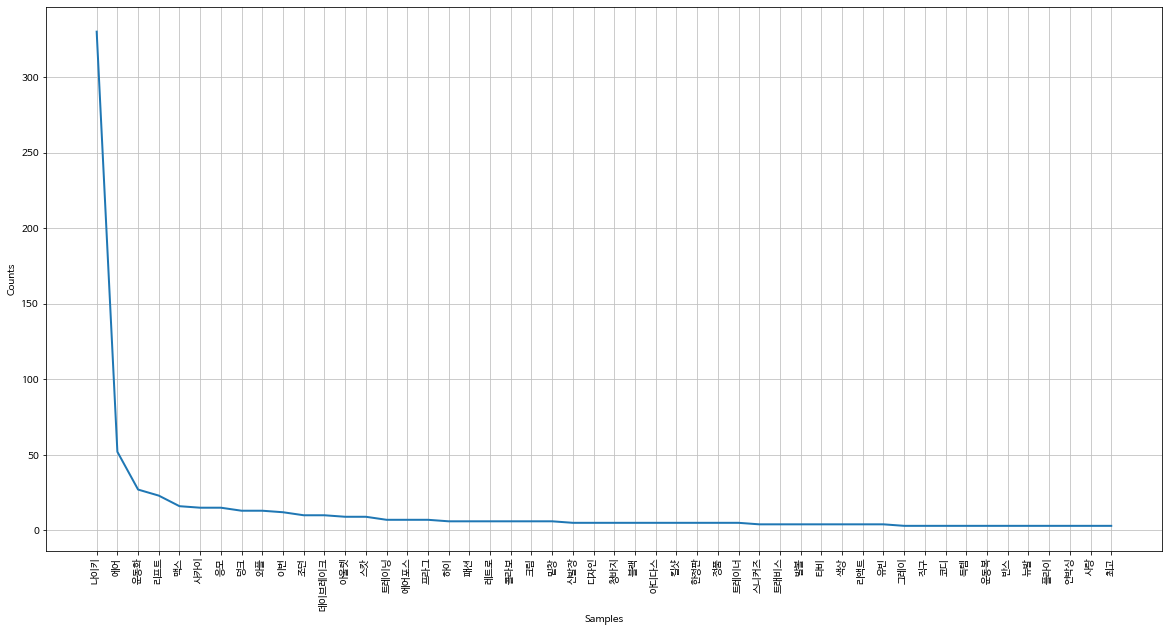

In [70]:
gift = nltk.Text(new_tokens, name='나이키신발')
plt.figure(figsize=(20,10))
gift.plot(50)
plt.show()

In [71]:
len(new_tokens)

1794

## 워드 클라우드 그리기

In [72]:
from wordcloud import WordCloud
from PIL import Image

In [73]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path,
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

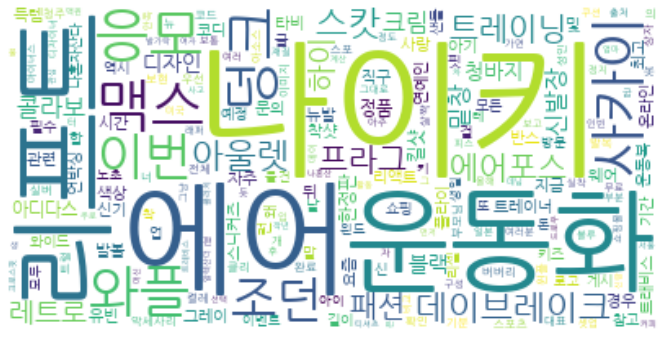

In [74]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 신발 그림에 표시

In [75]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [76]:
wc = WordCloud(
    font_path=path,
    relative_scaling=0.2,
    background_color='white',
    mask=mask,
    min_font_size =1,
    max_font_size=120
).generate_from_frequencies(dict(data))

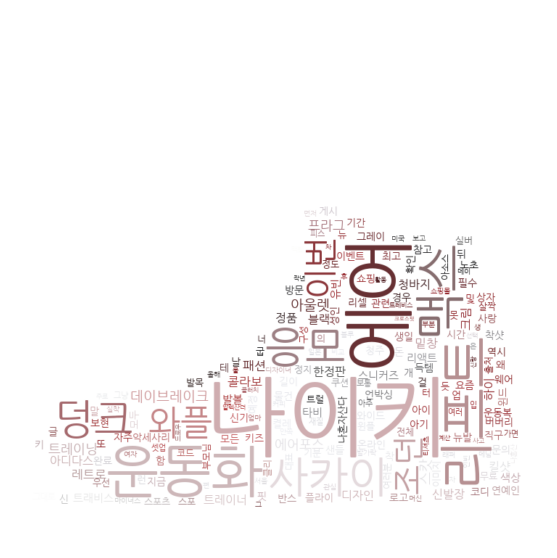

In [77]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

In [90]:
uploaded = files.upload()
maskfile2 = list(uploaded.keys())[0]

Saving nike4.png to nike4.png


In [91]:
mask2 = np.array(Image.open(maskfile2))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask2)

In [92]:
wc = WordCloud(
    font_path=path,
    relative_scaling=0.2,
    background_color='white',
    mask=mask2,
    min_font_size =1,
    max_font_size=120
).generate_from_frequencies(dict(data))

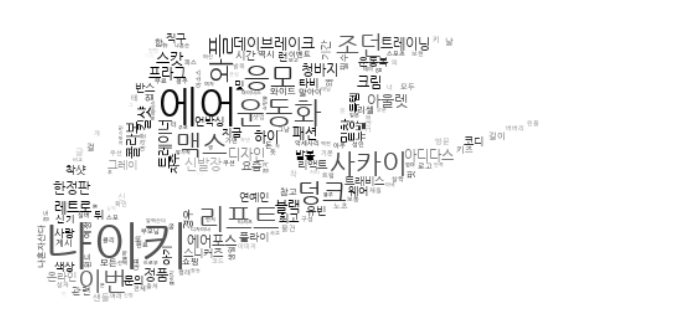

In [93]:
plt.figure(figsize=(12,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
|